<a href="https://colab.research.google.com/github/SushilKokare/DeepLearningStudy/blob/main/3_Regression_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import HTML

# Disable auto-completion in current notebook

display(HTML("""
<script>
google.colab.kernel.disableCompletions();
</script>
"""))

In [2]:
from keras.datasets import boston_housing

In [3]:
(xtr,ytr), (xts,yts) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [4]:
(xtr.shape,ytr.shape), (xts.shape,yts.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

In [5]:
print(ytr[:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


### Normalizing the data

In [6]:
mean = xtr.mean(axis=0)

In [7]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [8]:
std = xtr.std(axis=0)

In [9]:
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [10]:
xtr = xtr - mean

xtr = xtr / std

In [11]:
xtr[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [12]:
xts = xts - mean
xts = xts / std

In [13]:
xts[0]

array([ 1.55369355, -0.48361547,  1.0283258 , -0.25683275,  1.03838067,
        0.23545815,  1.11048828, -0.93976936,  1.67588577,  1.5652875 ,
        0.78447637, -3.48459553,  2.25092074])

### Building Model

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
xtr.shape

(404, 13)

In [16]:
def get_model():
  model = Sequential()
  model.add(Dense(64,activation='relu',input_shape=(13,)))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
  return model

### Validating your approach using K-Fold validation

In [17]:
import numpy as np

In [18]:
k = 4
num_value_samples = len(xtr) // k
num_epochs = 100
all_scores = list()

In [19]:
for i in range(k):
  print(' Fold number {}'.format(i+1))
  val_data = xtr[i*num_value_samples:(i+1)*num_value_samples]
  val_targets = ytr[i*num_value_samples:(i+1)*num_value_samples]

  partial_xtr = np.concatenate(
      (
          xtr[:i*num_value_samples],
          xtr[(i+1)*num_value_samples:]
      ), axis=0)
  partial_ytr = np.concatenate(
      (
          ytr[:i*num_value_samples],
          ytr[(i+1)*num_value_samples:]
      ), axis=0)

  model = get_model()

  model.fit(partial_xtr, partial_ytr,
            epochs=num_epochs,
            batch_size=1,verbose=0)

  val_mse, val_mae = model.evaluate(val_data,val_targets)
  print('Val MSE : ',val_mse)
  print('Val MAE : ',val_mae)
  all_scores.append(val_mae)

 Fold number 1
4/4 [==============================] - 0s 13ms/step - loss: 7.2848 - mae: 1.9294
Val MSE :  7.284759998321533
Val MAE :  1.9293867349624634
 Fold number 2
4/4 [==============================] - 0s 4ms/step - loss: 11.3214 - mae: 2.5043
Val MSE :  11.321382522583008
Val MAE :  2.5042531490325928
 Fold number 3
4/4 [==============================] - 0s 4ms/step - loss: 13.3539 - mae: 2.5412
Val MSE :  13.353927612304688
Val MAE :  2.5412261486053467
 Fold number 4
4/4 [==============================] - 0s 4ms/step - loss: 15.5098 - mae: 2.8177
Val MSE :  15.50978946685791
Val MAE :  2.8176536560058594


In [20]:
all_scores

[1.9293867349624634,
 2.5042531490325928,
 2.5412261486053467,
 2.8176536560058594]

###Saving the validation logs at each fold

In [31]:
num_epochs=150
all_mae_histories = list()

for i in range(k):
  print(' Fold number {}'.format(i+1))
  val_data = xtr[i*num_value_samples:(i+1)*num_value_samples]
  val_targets = ytr[i*num_value_samples:(i+1)*num_value_samples]

  partial_xtr = np.concatenate(
      (
          xtr[:i*num_value_samples],
          xtr[(i+1)*num_value_samples:]
      ), axis=0)
  partial_ytr = np.concatenate(
      (
          ytr[:i*num_value_samples],
          ytr[(i+1)*num_value_samples:]
      ), axis=0)

  model = get_model()

  history = model.fit(partial_xtr, partial_ytr,
            validation_data=(val_data,val_targets),
            epochs=num_epochs,
            batch_size=1,verbose=0)
  print(history.history.keys())
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

 Fold number 1
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
 Fold number 2
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
 Fold number 3
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
 Fold number 4
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


###  Building the history of successive mean k-fold validation scores

In [34]:
average_mae_history = [np.mean( [ x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [38]:
for i in average_mae_history:
  print(i,end=',')

4.125505447387695,3.2678980231285095,3.0136340260505676,2.769016683101654,2.6778746247291565,2.72619891166687,2.650582253932953,2.5805619955062866,2.6342737078666687,2.5588539242744446,2.7106882333755493,2.6178106665611267,2.488433539867401,2.4992611408233643,2.487821340560913,2.7327653765678406,2.4445658028125763,2.5150848031044006,2.463954210281372,2.450438678264618,2.4726937413215637,2.415377974510193,2.4724076986312866,2.423810660839081,2.500413179397583,2.436102867126465,2.5203845500946045,2.395723581314087,2.434366911649704,2.3640497624874115,2.3600620925426483,2.408730447292328,2.2916081845760345,2.490369439125061,2.3540944159030914,2.6115894317626953,2.3585556745529175,2.355366289615631,2.405188351869583,2.4440406262874603,2.403375029563904,2.4073687195777893,2.3991259336471558,2.513319969177246,2.3257771730422974,2.565289616584778,2.353423833847046,2.5079390704631805,2.3249123096466064,2.463699460029602,2.4889365434646606,2.488870680332184,2.4361135959625244,2.3862404227256775

### Plotting validation scores

In [40]:
import matplotlib.pyplot as plt

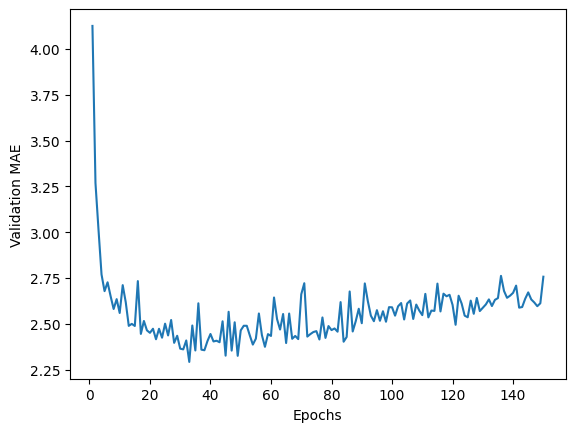

In [41]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [42]:
def smooth_curve(points,factor=0.9):
  smoothed_points = list()
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [43]:
smooth_mae_history = smooth_curve(average_mae_history[5:])

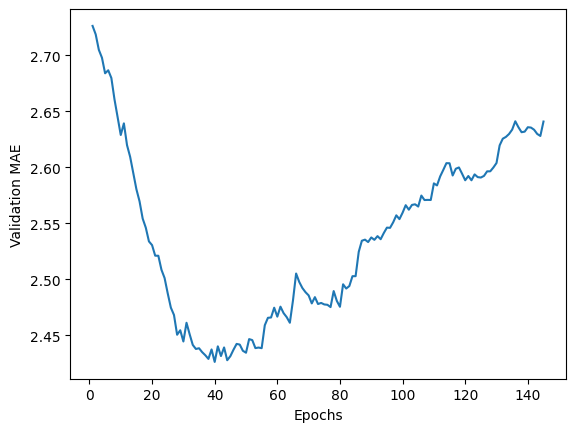

In [44]:
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### Training The Final Model

In [45]:
model = get_model()

In [46]:
historyfinal = model.fit(xtr,ytr,epochs=60,batch_size=16,verbose=0)

In [47]:
import pandas as pd

In [49]:
df = pd.DataFrame(historyfinal.history)

In [50]:
df.columns

Index(['loss', 'mae'], dtype='object')

In [58]:
len(df)

60

In [62]:
df['mae']

0     20.840776
1     16.968821
2     12.127520
3      7.501973
4      5.106440
5      4.138183
6      3.690206
7      3.391371
8      3.252015
9      3.110574
10     3.002964
11     2.857020
12     2.801249
13     2.722049
14     2.635803
15     2.593370
16     2.527202
17     2.450231
18     2.421389
19     2.372388
20     2.350411
21     2.330906
22     2.311518
23     2.274494
24     2.222727
25     2.219300
26     2.194512
27     2.155181
28     2.142853
29     2.145193
30     2.096474
31     2.096668
32     2.085983
33     2.086206
34     2.059654
35     2.034643
36     2.062479
37     2.022848
38     1.993505
39     2.026195
40     2.012865
41     1.980422
42     1.963243
43     1.975628
44     1.959093
45     1.944967
46     1.925166
47     1.958990
48     1.944624
49     1.906265
50     1.901752
51     1.852492
52     1.904983
53     1.853757
54     1.883430
55     1.882524
56     1.879063
57     1.853676
58     1.863720
59     1.841998
Name: mae, dtype: float64

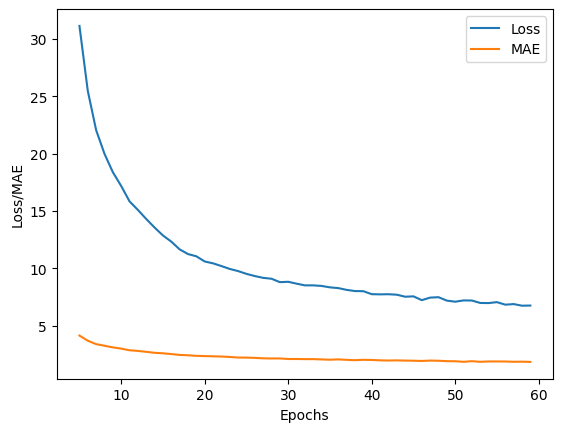

In [67]:
plt.plot(range(5,len(df)),df['loss'][5:],label='Loss')
plt.plot(range(5,len(df)),df['mae'][5:],label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss/MAE')
plt.legend()
plt.show()

In [68]:
test_mse_score, test_mae_score = model.evaluate(xts,yts)

4/4 [==============================] - 0s 4ms/step - loss: 18.6079 - mae: 2.7059


In [69]:
test_mse_score, test_mae_score

(18.607881546020508, 2.7059221267700195)